In [1]:
import torch
from moondream import MoondreamModel, MoondreamConfig
from safetensors.torch import load_file
from dataset import load_object_detection_dataset
from visualization_utils import plot_sample, plot_prediction
from moondream_functions import detect
device = "cuda" if torch.cuda.is_available() else "cpu"

safetensors_path = "gpro_model_2.safetensors"
base_model_path = "model.safetensors"
original_model = MoondreamModel(config=MoondreamConfig)
original_model.to(device)

model = MoondreamModel(config=MoondreamConfig)
model.to(device)

state_dict = load_file(safetensors_path)
base_state_dict = load_file(base_model_path)    
original_model.load_state_dict(base_state_dict)


model.load_state_dict(state_dict)




<All keys matched successfully>

In [6]:
val_ds = load_object_detection_dataset("train")


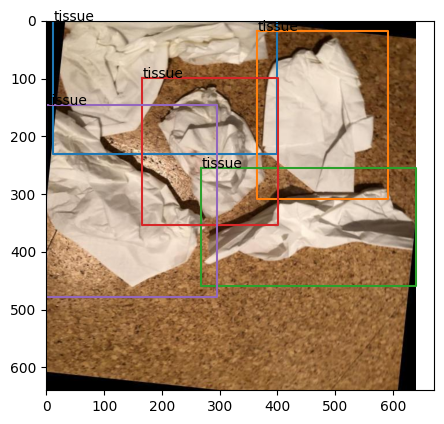

In [7]:
idx = 11

sample = val_ds[idx]

plot_sample(sample)



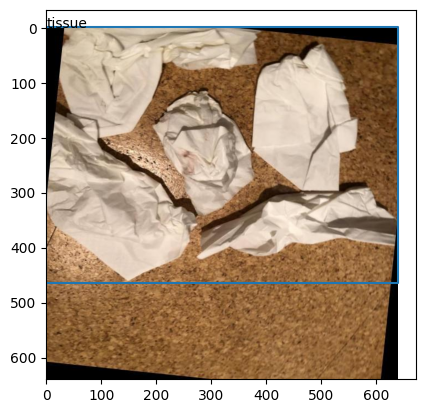

In [8]:
predictions = detect(model, sample[0], sample[1], None, temperature=0.)

plot_prediction(predictions, sample)

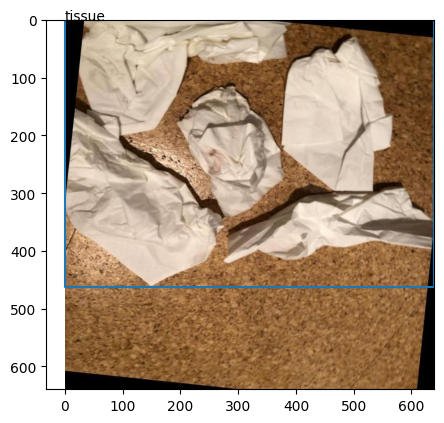

In [9]:
baseline_predictions = detect(original_model, sample[0], sample[1], None, temperature=0.)

plot_prediction(baseline_predictions, sample)

In [ ]:
predictions['objects'], baseline_predictions['objects']